# Missing Migrants Project
### Identifying the most dangerous migrant routes between January 2014 and March 2019



#### Gabriel James - August 2019

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

from pylab import rcParams

In [2]:
df1 = pd.read_csv("C:\\Users\\gabej\\Downloads\\MissingMigrants-Global-2019-03-29T18-36-07.csv")

df1.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [3]:
df1['Latitude'] = df1['Location Coordinates'].str.split(',').str[0].astype(float)
df1['Longitude'] = df1['Location Coordinates'].str.split(',').str[1].astype(float)

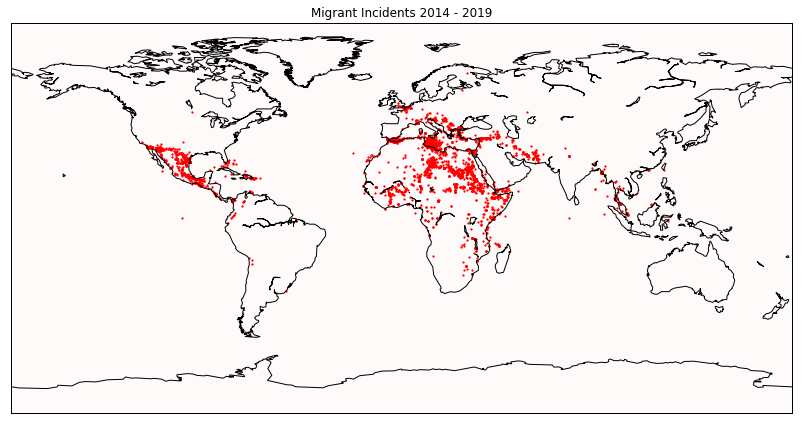

In [4]:
rcParams['figure.figsize']=(14,12)

map = Basemap()
map.drawcoastlines()
map.drawmapboundary(fill_color='snow')

lons = df1['Longitude'].tolist()
lats = df1['Latitude'].tolist()

x, y = map(lons, lats)

map.scatter(x, y, s = 1.5, color='red')
plt.title("Migrant Incidents 2014 - 2019")


plt.show()

## Understanding the Data Set

This data set is a record of deaths of refugees, asylum-seekers, and other migrants, who have gone missing along international routes worldwide.
 - Web ID is a unique identifier for each incident.
 - Region of Incident is a geographical grouping of regions smaller than continents (values include Mediterranean, Horn of Africa, South Asia, Central America, etc.)
 - Reported Date is the date the event was reported as having occurred by the Information Source
 - UNSD Geographical Grouping is the geographical designation of a region by the United States Statistics Division


There seem to be a lot of NaN values for Number of Survivors, Number of Females, Number of Males, and Number of Children.  Let's verify this.

In [5]:
print('Number of Survivors:', len(df1[~df1['Number of Survivors'].isna()]))
print('Number of Women:', len(df1[~df1['Number of Females'].isna()]))
print('Number of Men:', len(df1[~df1['Number of Males'].isna()]))
print('Number of Children:', len(df1[~df1['Number of Children'].isna()]))

Number of Survivors: 749
Number of Women: 897
Number of Men: 2813
Number of Children: 644


There are a lot of missing values here, but just over 50% of the data has non-null values.  Given how many missing values are present in the above fields, the analysis will focus mostly on Total Dead and Missing.

Let's identify the regions with the highest number of dead and missing.

In [6]:
dfTot_DM = df1.groupby('Region of Incident')[['Number Dead', 'Minimum Estimated Number of Missing', 'Total Dead and Missing']].sum().sort_values(by='Total Dead and Missing', ascending=False)
dfTot_DM

,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing
Region of Incident,,,
Mediterranean,6114.0,12115.0,18229
North Africa,3706.0,321.0,4027
Southeast Asia,752.0,1451.0,2203
US-Mexico Border,1941.0,23.0,1964
Sub-Saharan Africa,1438.0,111.0,1549
Horn of Africa,932.0,220.0,1152
Central America,613.0,6.0,619
Caribbean,176.0,323.0,499
Europe,421.0,21.0,442


### Let's get a sense of the distributions of these incidents

In [7]:
dfh = df1.groupby('Region of Incident')['Total Dead and Missing'].mean().to_frame()
dfh.columns = ['Average Dead and Missing per Incident']

dfh2 = df1.groupby('Region of Incident')['Total Dead and Missing'].median().to_frame()
dfh2.columns = ['Median Dead and Missing per Incident']

dfh3 = df1.groupby('Region of Incident')['Total Dead and Missing'].count().to_frame()
dfh3.columns = ['Number of Incidents']


dfD = dfTot_DM.join(dfh).join(dfh2).join(dfh3).sort_values(by='Median Dead and Missing per Incident', ascending=False)
dfD

,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Average Dead and Missing per Incident,Median Dead and Missing per Incident,Number of Incidents
Region of Incident,,,,,,
Central Asia,52.0,0.0,52,52.000000,52,1
Mediterranean,6114.0,12115.0,18229,18.525407,3,984
Southeast Asia,752.0,1451.0,2203,22.947917,3,96
Caribbean,176.0,323.0,499,8.457627,3,59
East Asia,5.0,26.0,31,6.200000,3,5
North Africa,3706.0,321.0,4027,3.250202,2,1239
US-Mexico Border,1941.0,23.0,1964,1.468960,1,1337
Sub-Saharan Africa,1438.0,111.0,1549,3.261053,1,475
Horn of Africa,932.0,220.0,1152,4.902128,1,235


Aside from Central Asia, every region has low Median Dead and Missing.  However, both Southeast Asia and the Mediterranean have high averages.  What do these incidents look like?

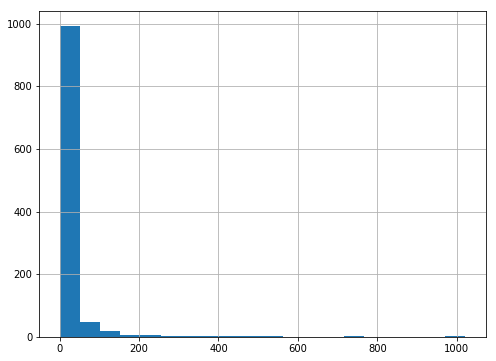

In [8]:
rcParams['figure.figsize']=(8,6)

dfA = df1[(df1['Region of Incident']=='Mediterranean') | (df1['Region of Incident']=='Southeast Asia')]
dfA['Total Dead and Missing'].hist(bins = 20)

In [9]:
dfA[['Region of Incident', 'Reported Date', 
     'Total Dead and Missing', 'Cause of Death', 
     'Migration Route', 'Source Quality']].sort_values(by='Total Dead and Missing', ascending=False).head(10)

,Region of Incident,Reported Date,Total Dead and Missing,Cause of Death,Migration Route,Source Quality
4977,Mediterranean,"April 18, 2015",1022,Drowning,Central Mediterranean,4
5093,Southeast Asia,"December 31, 2014",750,"Starvation, Violence, Dehydration",NaN,4
3785,Mediterranean,"May 26, 2016",550,Drowning,Central Mediterranean,4
5136,Mediterranean,"September 21, 2014",500,Drowning,Central Mediterranean,4
3913,Mediterranean,"April 09, 2016",459,Drowning,Central Mediterranean,4
4985,Mediterranean,"April 13, 2015",400,Drowning,Central Mediterranean,4
3752,Mediterranean,"June 03, 2016",339,Drowning,Central Mediterranean,4
5046,Mediterranean,"February 09, 2015",307,Drowning,Central Mediterranean,4
3372,Mediterranean,"September 21, 2016",288,Drowning,Central Mediterranean,4
3792,Mediterranean,"May 25, 2016",255,Drowning,Central Mediterranean,4


There is an event with over 1,000 Dead and Missing.  Let's look at the most lethal incidents in the entire dataset.

In [10]:
df1[['Region of Incident', 'Reported Date', 
     'Total Dead and Missing', 'Cause of Death', 
     'Migration Route', 'Source Quality']].sort_values(by='Total Dead and Missing', ascending=False).head(20)

,Region of Incident,Reported Date,Total Dead and Missing,Cause of Death,Migration Route,Source Quality
4977,Mediterranean,"April 18, 2015",1022,Drowning,Central Mediterranean,4
5093,Southeast Asia,"December 31, 2014",750,"Starvation, Violence, Dehydration",NaN,4
3785,Mediterranean,"May 26, 2016",550,Drowning,Central Mediterranean,4
5136,Mediterranean,"September 21, 2014",500,Drowning,Central Mediterranean,4
3913,Mediterranean,"April 09, 2016",459,Drowning,Central Mediterranean,4
4985,Mediterranean,"April 13, 2015",400,Drowning,Central Mediterranean,4
3752,Mediterranean,"June 03, 2016",339,Drowning,Central Mediterranean,4
5046,Mediterranean,"February 09, 2015",307,Drowning,Central Mediterranean,4
3372,Mediterranean,"September 21, 2016",288,Drowning,Central Mediterranean,4
3792,Mediterranean,"May 25, 2016",255,Drowning,Central Mediterranean,4


The Mediterranean stands out, holding 17 of the top 20 incidents, and almost all of these incidents were caused by drowning.  Addtionally, the top 16 incidents have Source Quality = 4.  Let's only look at incidents with Source Quality 3 or greater.  How will this affect the distributions by incident?

In [11]:
df2 = df1[df1['Source Quality']>=3]

print(len(df1))
print(len(df2))

5333
2551


We lost about half the incidents here.
Let's compare the distributions by Region of Incident

In [12]:
dfTot_DM2 = df2.groupby('Region of Incident')[['Number Dead', 'Minimum Estimated Number of Missing', 'Total Dead and Missing']].sum().sort_values(by='Total Dead and Missing', ascending=False)
dfTot_DM2

dfh = df2.groupby('Region of Incident')['Total Dead and Missing'].mean().to_frame()
dfh.columns = ['Average Dead and Missing per Incident']

dfh2 = df2.groupby('Region of Incident')['Total Dead and Missing'].median().to_frame()
dfh2.columns = ['Median Dead and Missing per Incident']

dfh3 = df2.groupby('Region of Incident')['Total Dead and Missing'].count().to_frame()
dfh3.columns = ['Number of Incidents']


dfD2 = dfTot_DM2.join(dfh).join(dfh2).join(dfh3).sort_values(by='Median Dead and Missing per Incident', ascending=False)

In [13]:
dfC = pd.merge(dfD, dfD2, how="outer", on='Region of Incident', suffixes=("", "_Filt"))
dfC

,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Average Dead and Missing per Incident,Median Dead and Missing per Incident,Number of Incidents,Number Dead_Filt,Minimum Estimated Number of Missing_Filt,Total Dead and Missing_Filt,Average Dead and Missing per Incident_Filt,Median Dead and Missing per Incident_Filt,Number of Incidents_Filt
Region of Incident,,,,,,,,,,,,
Central Asia,52.0,0.0,52,52.000000,52,1,52.0,0.0,52.0,52.000000,52.0,1.0
Mediterranean,6114.0,12115.0,18229,18.525407,3,984,4926.0,10647.0,15573.0,19.863520,3.0,784.0
Southeast Asia,752.0,1451.0,2203,22.947917,3,96,354.0,1313.0,1667.0,32.057692,4.0,52.0
Caribbean,176.0,323.0,499,8.457627,3,59,119.0,239.0,358.0,11.187500,4.5,32.0
East Asia,5.0,26.0,31,6.200000,3,5,3.0,9.0,12.0,6.000000,6.0,2.0
North Africa,3706.0,321.0,4027,3.250202,2,1239,319.0,260.0,579.0,14.121951,13.0,41.0
US-Mexico Border,1941.0,23.0,1964,1.468960,1,1337,1554.0,7.0,1561.0,1.468485,1.0,1063.0
Sub-Saharan Africa,1438.0,111.0,1549,3.261053,1,475,471.0,56.0,527.0,21.080000,7.0,25.0
Horn of Africa,932.0,220.0,1152,4.902128,1,235,495.0,200.0,695.0,17.375000,8.5,40.0


In [14]:
dfC[['Total Dead and Missing', 'Average Dead and Missing per Incident', 
     'Median Dead and Missing per Incident', 'Number of Incidents',
     'Total Dead and Missing_Filt', 'Average Dead and Missing per Incident_Filt',
     'Median Dead and Missing per Incident_Filt', 
     'Number of Incidents_Filt']].sort_values(by="Average Dead and Missing per Incident_Filt", ascending=False)

,Total Dead and Missing,Average Dead and Missing per Incident,Median Dead and Missing per Incident,Number of Incidents,Total Dead and Missing_Filt,Average Dead and Missing per Incident_Filt,Median Dead and Missing per Incident_Filt,Number of Incidents_Filt
Region of Incident,,,,,,,,
Central Asia,52,52.000000,52,1,52.0,52.000000,52.0,1.0
Southeast Asia,2203,22.947917,3,96,1667.0,32.057692,4.0,52.0
Sub-Saharan Africa,1549,3.261053,1,475,527.0,21.080000,7.0,25.0
Mediterranean,18229,18.525407,3,984,15573.0,19.863520,3.0,784.0
Horn of Africa,1152,4.902128,1,235,695.0,17.375000,8.5,40.0
North Africa,4027,3.250202,2,1239,579.0,14.121951,13.0,41.0
Caribbean,499,8.457627,3,59,358.0,11.187500,4.5,32.0
East Asia,31,6.200000,3,5,12.0,6.000000,6.0,2.0
South America,92,3.285714,1,28,70.0,4.666667,2.0,15.0


A couple things to note here.  First, filtering caused some significant increases in Average and Median Dead and Missing.  What really sticks out is the discrepancy between Incident counts.  We would expect that a filtered dataset with half the rows should have half the incidents, but Sub-Saharan Africa lost 450 incidents in the filter.

This, along with the increase in Average and Median, suggests that there is a strong interaction between Source Quality and Total Dead and Missing.  This makes intuitive sense.  Larger, more reliable sources are most likely to report on very deadly incidents and in regions nearer to Western countries.

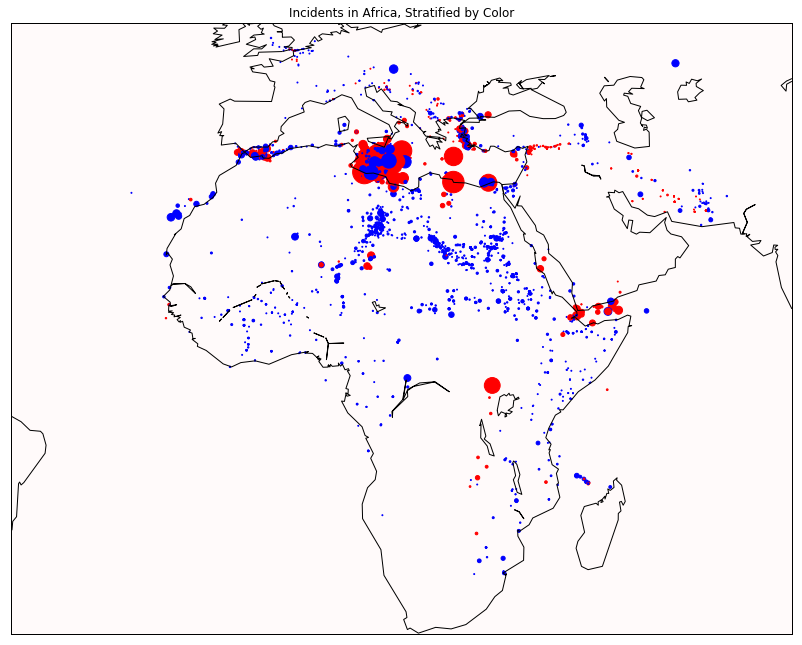

In [15]:
rcParams['figure.figsize']=(14,12)

df1['Quality'] = np.where(df1['Source Quality']>=4, "High Quality", "Low Quality")


map = Basemap(llcrnrlat = -35,
              llcrnrlon = -40,
              urcrnrlat = 55,
              urcrnrlon = 75)
map.drawcoastlines()
map.drawmapboundary(fill_color='snow')

lons = df1['Longitude'].tolist()
lats = df1['Latitude'].tolist()

size = df1['Total Dead and Missing'].tolist()
colr = {'High Quality': 'red', 'Low Quality': 'blue'}

x, y = map(lons, lats)

map.scatter(x, y, s = size, c = df1['Quality'].map(colr))
plt.title("Incidents in Africa, Stratified by Color")
plt.show()

This map of Africa confirms our suspicions. There is a clear difference between high quality (red) and low quality (blue).  First, incidents with the highest Total Dead and Missing were reported by high quality sources.  Second, the vast majority of incidents that occurred below North Africa are from low quality sources.  

Given that filtering the data by Source Quality can create drastic differences in incidents reported on and type of incident reported on and that Source Quality is so undocumented, I will not filter by Source Quality for this analysis.

#### Cause of Death

In [16]:
print("There are", len(df1['Cause of Death'].unique()), "unique causes of death")

There are 233 unique causes of death


Since there are so many categories (some are very similar), we may not get the whole picture.  Let's continue on.

In [17]:
dfCa = df1.groupby('Cause of Death')['Total Dead and Missing'].aggregate(['sum', 'mean', 'median', 'count'])
dfCa.sort_values(by="sum", ascending=False).head(20)

,sum,mean,median,count
Cause of Death,,,,
Drowning,16852,17.409091,2.0,968
Presumed drowning,3266,9.412104,2.0,347
Sickness and lack of access to medicines,1839,2.429326,1.0,757
Unknown,1592,2.899818,1.0,549
Vehicle Accident,1210,2.725225,1.0,444
Mixed,1029,38.111111,18.0,27
"Starvation, Violence, Dehydration",750,750.000000,750.0,1
Unknown (skeletal remains),474,1.010661,1.0,469
Shot,391,2.286550,1.0,171


Let's look at median and remove causes with low n values.

In [18]:
dfCa[dfCa['count']>=5].sort_values(by="median", ascending=False).head(20)

,sum,mean,median,count
Cause of Death,,,,
Mixed,1029,38.111111,18.0,27
"Starvation, Excessive Physical Abuse",81,5.400000,3.0,15
"Dehydration, Harsh weather/lack of adequate shelter",65,3.611111,3.0,18
"Starvation, Dehydration, Harsh weather/lack of adequate shelter",60,3.000000,3.0,20
"Starvation, Dehydration, Suffocation",17,2.833333,3.0,6
"Harsh weather/lack of adequate shelter, Excessive Physical Abuse, Sexual abuse",17,2.428571,2.0,7
Shot or stabbed,170,2.207792,2.0,77
"Sickness and lack of access to medicines, Harsh weather/lack of adequate shelter, Suffocation",9,1.800000,2.0,5
"Sickness and lack of access to medicines, Starvation",25,1.923077,2.0,13


The Causes of Death with highest median typically relate to exposure or lack of basic resources.

So far, this analysis has looked at total deaths as a measure of lethality.  A better metric might be survivability rate (i.e., the number of survivors divided by the sum of dead, missing, and survivors.  We will use its opposite lethality.

First, let's check how reliable the Number of Survivors field is.

In [19]:
len(df1[df1['Number of Survivors'].isna()])

4584

That's a lot of NaN values.  
Let's apply a filter to remove NaN values from this part of the analysis, and see if there are any insights we can glean.

In [20]:
df3 = df1.copy(deep=True)
df3 = df3[~df3['Number of Survivors'].isna()]
df3['Lethality'] = df3['Total Dead and Missing']/(df3['Total Dead and Missing'] + df3['Number of Survivors'])


df3.groupby('Region of Incident')['Lethality'].aggregate(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
Region of Incident,,
Central Asia,0.912281,1
East Asia,0.505061,4
US-Mexico Border,0.465959,53
South America,0.453410,5
South Asia,0.430340,7
Sub-Saharan Africa,0.429613,31
Caribbean,0.424539,30
Europe,0.419776,47
Southeast Asia,0.406770,28


Interesting.  It appears as though Central America has the lowest Lethality rate, and the U.S.-Mexico border has one of the highest.  Central Asia should be ignored because of the low n value, and East Asia is questionable.  

So, given an incident occurs in the Mediterranean, we expect about a third of migrants to die or go missing.

Does this subset of the data represent the total data?  Let's compare summary statistics by region to get an idea.

In [21]:
dfTot_DM3 = df3.groupby('Region of Incident')[['Number Dead', 'Minimum Estimated Number of Missing', 'Total Dead and Missing']].sum().sort_values(by='Total Dead and Missing', ascending=False)
dfTot_DM3

dfh = df3.groupby('Region of Incident')['Total Dead and Missing'].mean().to_frame()
dfh.columns = ['Average Dead and Missing per Incident']

dfh2 = df3.groupby('Region of Incident')['Total Dead and Missing'].median().to_frame()
dfh2.columns = ['Median Dead and Missing per Incident']

dfh3 = df2.groupby('Region of Incident')['Total Dead and Missing'].count().to_frame()
dfh3.columns = ['Number of Incidents']


dfD3 = dfTot_DM3.join(dfh).join(dfh2).join(dfh3).sort_values(by='Median Dead and Missing per Incident', ascending=False)

In [22]:
dfC2 = pd.merge(dfD, dfD3, how="outer", on='Region of Incident', suffixes=("", "_Filt"))
dfC2

,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Average Dead and Missing per Incident,Median Dead and Missing per Incident,Number of Incidents,Number Dead_Filt,Minimum Estimated Number of Missing_Filt,Total Dead and Missing_Filt,Average Dead and Missing per Incident_Filt,Median Dead and Missing per Incident_Filt,Number of Incidents_Filt
Region of Incident,,,,,,,,,,,,
Central Asia,52.0,0.0,52,52.000000,52,1,52.0,0.0,52.0,52.000000,52.0,1.0
Mediterranean,6114.0,12115.0,18229,18.525407,3,984,3763.0,10353.0,14116.0,32.600462,7.0,784.0
Southeast Asia,752.0,1451.0,2203,22.947917,3,96,302.0,181.0,483.0,17.250000,8.5,52.0
Caribbean,176.0,323.0,499,8.457627,3,59,135.0,209.0,344.0,11.466667,6.0,32.0
East Asia,5.0,26.0,31,6.200000,3,5,2.0,26.0,28.0,7.000000,6.0,2.0
North Africa,3706.0,321.0,4027,3.250202,2,1239,125.0,59.0,184.0,9.684211,8.0,41.0
US-Mexico Border,1941.0,23.0,1964,1.468960,1,1337,82.0,3.0,85.0,1.603774,1.0,1063.0
Sub-Saharan Africa,1438.0,111.0,1549,3.261053,1,475,461.0,90.0,551.0,17.774194,7.0,25.0
Horn of Africa,932.0,220.0,1152,4.902128,1,235,402.0,181.0,583.0,29.150000,31.5,40.0


In [23]:
dfC[['Total Dead and Missing', 'Average Dead and Missing per Incident', 
     'Median Dead and Missing per Incident', 'Number of Incidents',
     'Total Dead and Missing_Filt', 'Average Dead and Missing per Incident_Filt',
     'Median Dead and Missing per Incident_Filt', 
     'Number of Incidents_Filt']].sort_values(by="Average Dead and Missing per Incident_Filt", ascending=False)

,Total Dead and Missing,Average Dead and Missing per Incident,Median Dead and Missing per Incident,Number of Incidents,Total Dead and Missing_Filt,Average Dead and Missing per Incident_Filt,Median Dead and Missing per Incident_Filt,Number of Incidents_Filt
Region of Incident,,,,,,,,
Central Asia,52,52.000000,52,1,52.0,52.000000,52.0,1.0
Southeast Asia,2203,22.947917,3,96,1667.0,32.057692,4.0,52.0
Sub-Saharan Africa,1549,3.261053,1,475,527.0,21.080000,7.0,25.0
Mediterranean,18229,18.525407,3,984,15573.0,19.863520,3.0,784.0
Horn of Africa,1152,4.902128,1,235,695.0,17.375000,8.5,40.0
North Africa,4027,3.250202,2,1239,579.0,14.121951,13.0,41.0
Caribbean,499,8.457627,3,59,358.0,11.187500,4.5,32.0
East Asia,31,6.200000,3,5,12.0,6.000000,6.0,2.0
South America,92,3.285714,1,28,70.0,4.666667,2.0,15.0


We've run into a similar issue as before!  Based on the fact that the median and average are higher for most regions, it appears that there are fewer NaN Number of Survivors for larger events.  Again, this makes intuitive sense.  Larger incidents (with higher casualties) are much more likely to receive outside intervention, which makes it more likely that survivor counts are given.

Now, let's look at migration routes.

In [24]:
df1.groupby('Migration Route')['Total Dead and Missing'].aggregate(['sum', 'mean', 'median', 'count']).sort_values(by='median', ascending=False)

,sum,mean,median,count
Migration Route,,,,
Horn Africa to Yemen,357,23.800000,20.0,15
Malaysia to Indonesia,13,13.000000,13.0,1
Western African,204,13.600000,7.0,15
Dominican Republic to Puerto Rico,13,6.500000,6.5,2
Central Mediterranean,15227,30.515030,6.0,499
Venezuela to Curaçao,5,5.000000,5.0,1
Eastern Mediterranean,1546,6.721739,3.0,230
Calais to United Kingdom,51,1.000000,1.0,51
Caribbean to Central America,21,7.000000,1.0,3


### A time series:

Text(0.5, 1.0, 'Total Dead and Missing by Month')

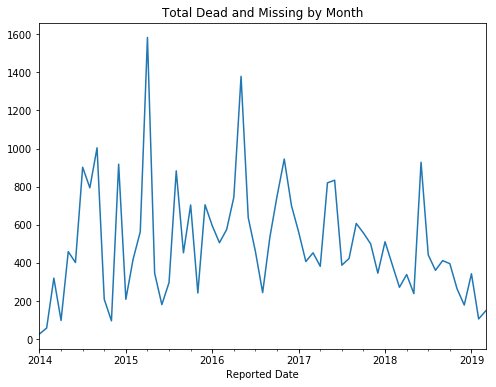

In [25]:
rcParams['figure.figsize']=(8,6)

df3 = df1.copy(deep=True)
df3['Reported Date'] = pd.to_datetime(df3['Reported Date'])
df3 = df3.sort_values(by='Reported Date')
df3 = df3.set_index('Reported Date')
df3 = df3['Total Dead and Missing'].to_frame()


df3 = df3.resample('M', kind='timestamp').sum()
df3['Total Dead and Missing'].plot().set_title('Total Dead and Missing by Month')

## Map of the Mediterranean

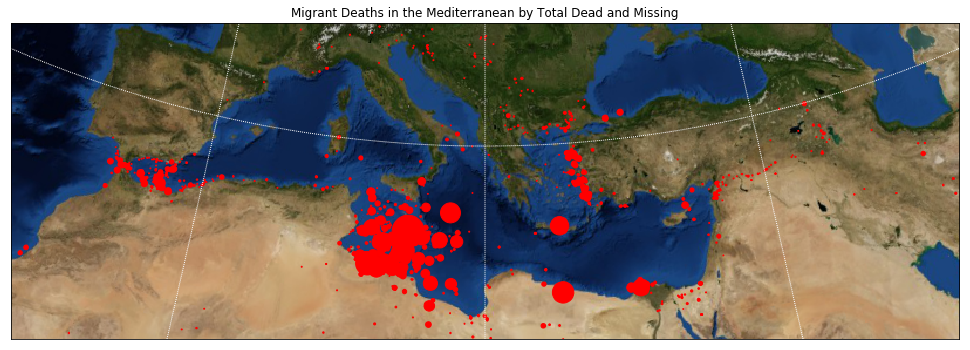

In [29]:
rcParams['figure.figsize']=(17,14)

map = Basemap(width=6000000, height=2000000,
              projection='lcc', lat_1 = 40, lon_1 = 80, lat_0=38, lon_0=20)
map.bluemarble()

lons = df1['Longitude'].tolist()
lats = df1['Latitude'].tolist()

x, y = map(lons, lats)
size = df1['Total Dead and Missing']

map.scatter(x, y, color='red', s = size)
map.drawmeridians(range(0, 360, 20), color='w')
map.drawparallels(range(0, 360, 20), color='w')


plt.title("Migrant Deaths in the Mediterranean by Total Dead and Missing")
plt.show()

## Conclusions

### Summary

Most deaths have occurred in the Mediterranean, North Africa, and Southeast Asia.  Southeast Asia and the Mediterranean have the highest mean and median number of dead and missing per incident.  The deadliest event in the dataset occurred in the Mediterranean on April 18, 2015, when 1,022 people drowned.  Of the 20 deadliest events in the dataset, 17 occurred in the Mediterranean.

Drowning was the leading cause of death, but incidents related to exposure and lack of basic human needs had the highest medians.  Additionally, taking the Horn of Africa to Yemen was, by median, the most dangerous migration route to take.


### Interpretations

Given the geopolitical climate of Africa and the Middle East, it makes sense that the most deaths have occurred in the Mediterranean.  Additionally, a sinking boat in the Mediterranean is a death sentence for everyone on board, so it isn't surprising that the incidents with highest deaths occurred because of drowning.

Unfortunately, because of the missing values, lack of documentation in this dataset, and limitations of the data, there are many things I would like to make conclusions about but can't:
 - I would like to be able to filter low Source Quality out, but, as seen earlier in the analysis, there are interactions between Source Quality and the region of incident, data collected on survivors, and if the incident was recorded.
 - I would like to be able to develop a reliable lethality metric, but because of missing data, I cannot make meaningful conclusions about types of incident and say something along the lines of "given an incident occurred with x, y, and z qualities, we expect some percentage of passengers to survive."
 - I would like to know which migration routes are safer or more dangerous, but because each row is an incident and not a migration, I cannot generate probabilities of incident or death given that a group is moving from one location to another along a certain route by a certain means of transportation.
 - I would like to say that, based on the time series graph above, migration is becoming safer as time goes on.  However, there is no information on how many people are migrating, so such a conclusion cannot be made.